In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [24]:
train_df = pd.read_csv("../datasets/clean_train.csv")

In [25]:
train_df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [26]:
train_df.shape

(2051, 81)

# EDA

In [21]:
train_df.corr()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_price
id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
pid,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
ms_subclass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
lot_frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
lot_area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
overall_qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
overall_cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
year_built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
year_remod/add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
mas_vnr_area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


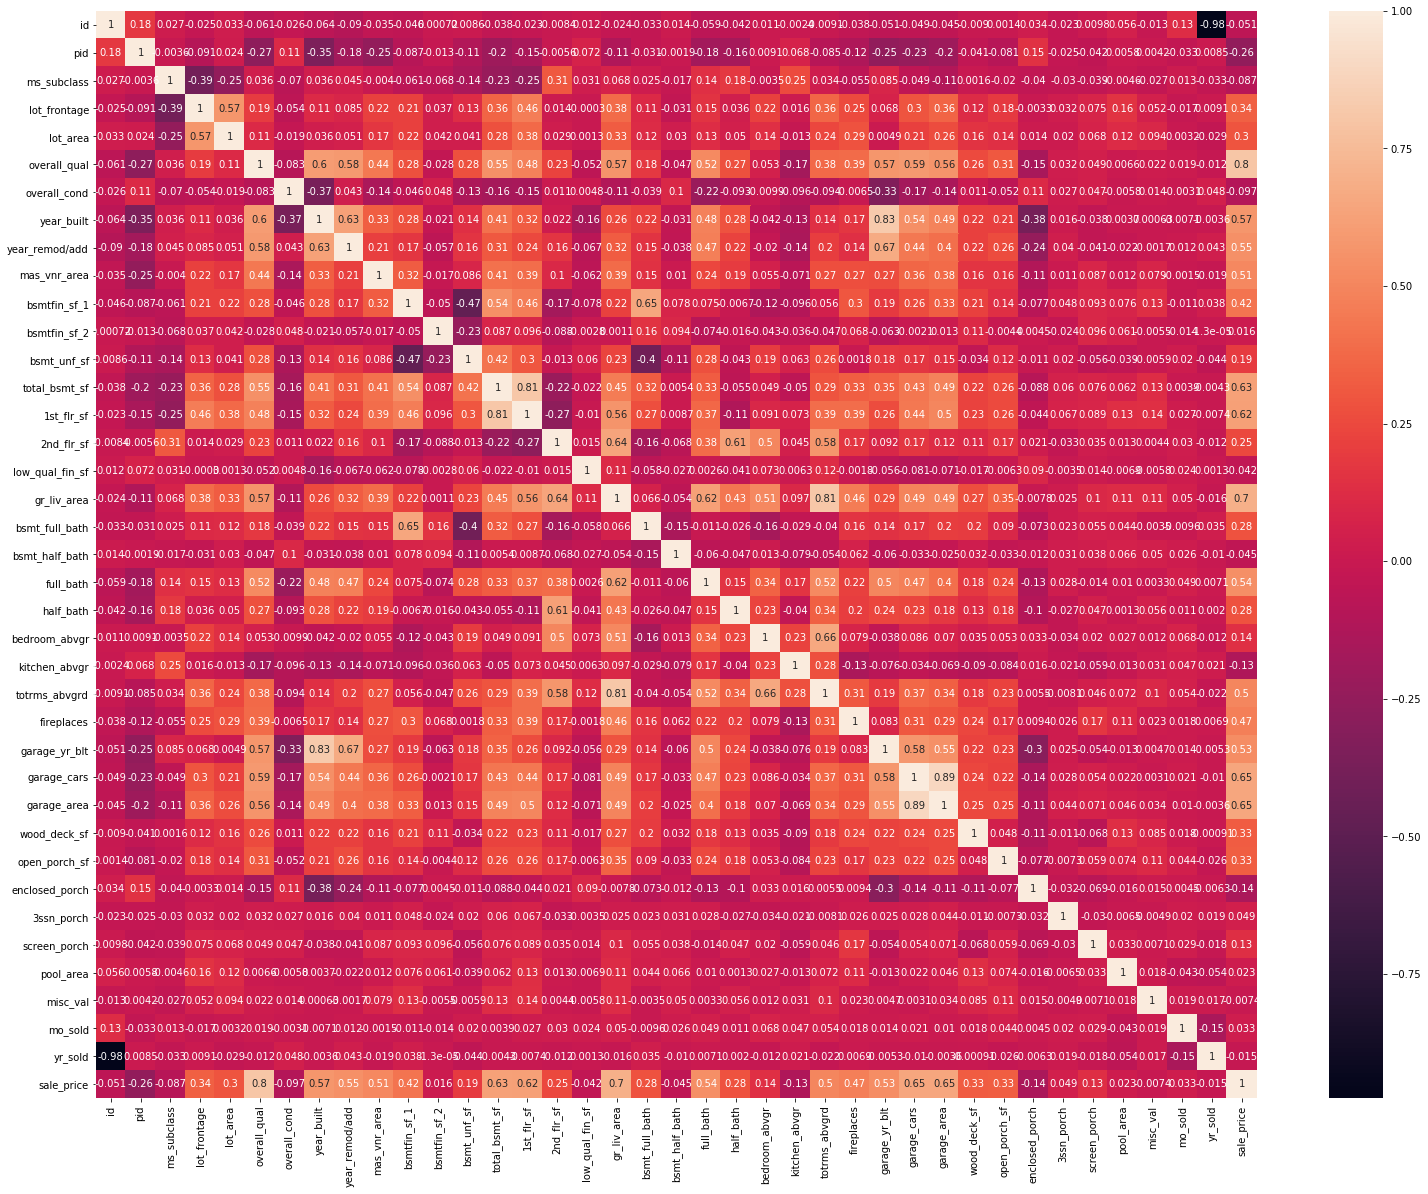

In [8]:
plt.figure(figsize=(26, 20))

sns.heatmap(train_df.corr(),
            annot=True);

In [6]:
train_df.corr()[["sale_price"]]

,sale_price
id,-0.051398
pid,-0.255052
ms_subclass,-0.087335
lot_frontage,0.341842
lot_area,0.296566
overall_qual,0.800207
overall_cond,-0.097019
year_built,0.571849
year_remod/add,0.550370
mas_vnr_area,0.512230


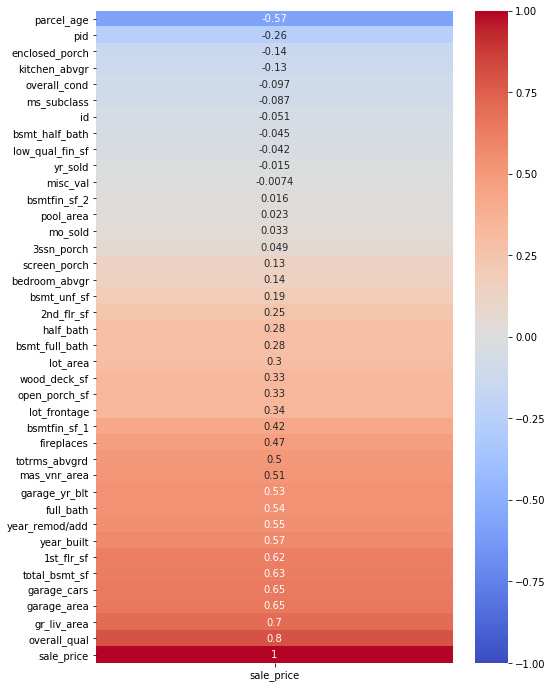

In [36]:
# Heatmap - credit Riley from lecture
plt.figure(figsize=(8, 12))

sns.heatmap(train_df.corr()[["sale_price"]].sort_values("sale_price"),
            annot=True,
            cmap="coolwarm",
            vmin=-1,
            vmax=1);


In [27]:
print(f"overall_qual: {train_df['overall_qual'].isna().sum()}")
print(f"gr_liv_area: {train_df['gr_liv_area'].isna().sum()}")
print(f"1st_flr_sf: {train_df['1st_flr_sf'].isna().sum()}")
print(f"year_built: {train_df['year_built'].isna().sum()}")
print(f"total_bsmt_sf: {train_df['total_bsmt_sf'].isna().sum()}")

overall_qual: 0
gr_liv_area: 0
1st_flr_sf: 0
year_built: 0
total_bsmt_sf: 1


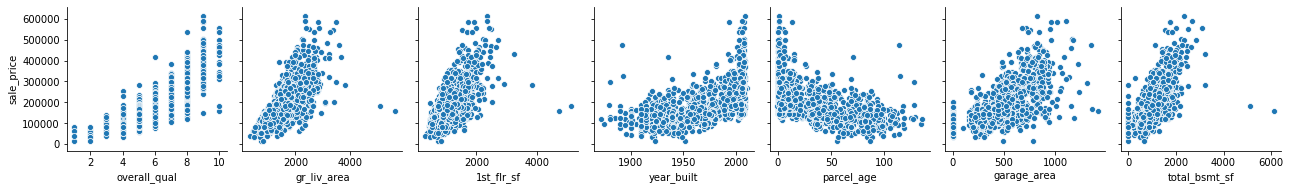

In [41]:
# Pairplots of the top 5 highest corr from heatmap above (less bsmt and garage cols):
sns.pairplot(train_df,
             x_vars=["overall_qual",
                     "gr_liv_area",
                     "1st_flr_sf",
                     "year_built",
                     "parcel_age",
                     "garage_area",
                     "total_bsmt_sf"],
             y_vars=["sale_price"]);

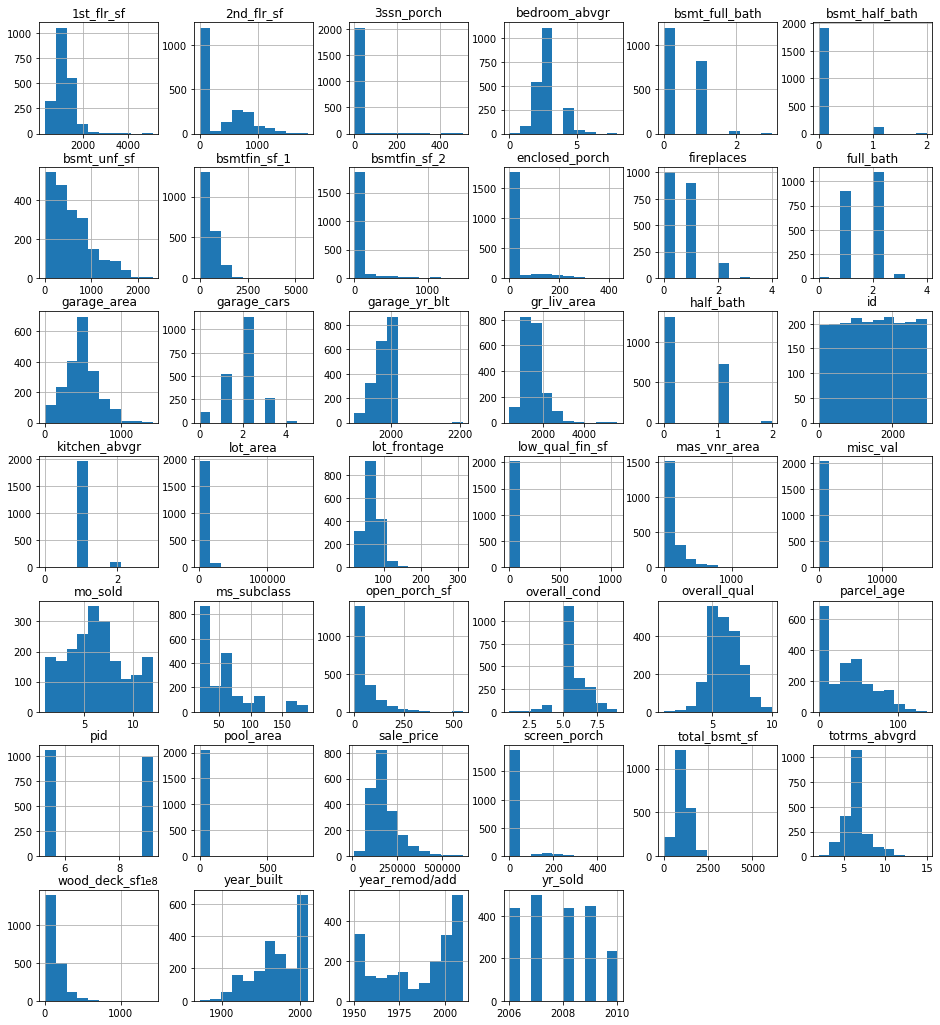

In [40]:
# Dist plots of all numeric:
train_df.hist(figsize=(16, 18));

### Boxplots: Checking for outliers

***Overall Quality of the House***
- One outlier on the left/ min side

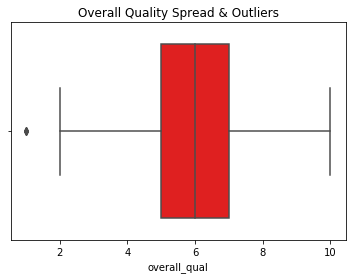

In [11]:
sns.boxplot(train_df["overall_qual"],
            color="red")

plt.title("Overall Quality Spread & Outliers");

In [12]:
# Outliers:
train_df["overall_qual"].min()

1

In [13]:
train_df["overall_qual"].describe()

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: overall_qual, dtype: float64

In [15]:
q1 = np.percentile(train_df["overall_qual"], 25)
q3 = np.percentile(train_df["overall_qual"], 75)
IQR = q3 - q1
IQR

2.0

***Above Ground Living Area***
- Many outliers on the right.

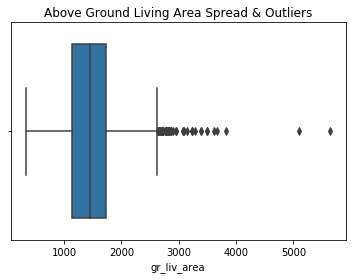

In [16]:
sns.boxplot(train_df["gr_liv_area"])

plt.title("Above Ground Living Area Spread & Outliers");

In [45]:
train["gr_liv_area"].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: gr_liv_area, dtype: float64

***1 Floot Square Feet***
- Many outliers on the right of the plot

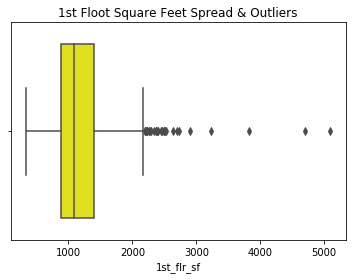

In [46]:
sns.boxplot(train["1st_flr_sf"],
            color="yellow")
plt.title("1st Floot Square Feet Spread & Outliers");

In [47]:
train["1st_flr_sf"].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st_flr_sf, dtype: float64

***Year Built of Unit***
- A handful of outliers on the left of the boxplot

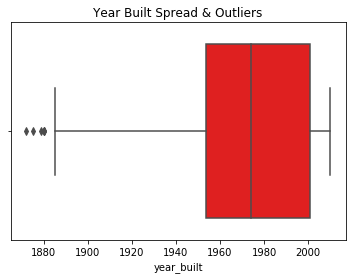

In [48]:
sns.boxplot(train["year_built"],
            color="red")

plt.title("Year Built Spread & Outliers");

In [49]:
train["year_built"].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: year_built, dtype: float64

***Garage Area***
- No outliers, all data explained in the boxplot above

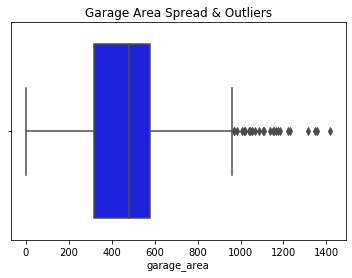

In [17]:
sns.boxplot(train_df["garage_area"],
            color="blue")

plt.title("Garage Area Spread & Outliers");

In [51]:
train["year_remod/add"].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: year_remod/add, dtype: float64

***Total BSMT Sq Feet***

Text(0.5, 1.0, 'Total Sq Feet of Basement')

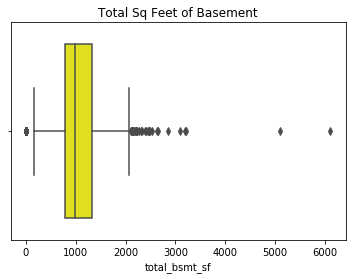

In [18]:
sns.boxplot(train_df["total_bsmt_sf"],
            color="yellow")

plt.title("Total Sq Feet of Basement")

In [19]:
train_df["total_bsmt_sf"].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

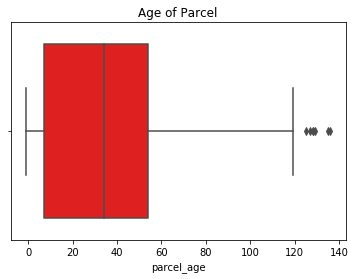

In [37]:
sns.boxplot(train_df["parcel_age"],
            color="red")

plt.title("Age of Parcel");

In [39]:
train_df["parcel_age"].describe()  # a -1 for age min? Need to be investigate.

count    2051.000000
mean       36.066797
std        30.211061
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: parcel_age, dtype: float64

# Feature Engineering

### Create Age of House Column.
- From the heatmaps and correlations charted above, we have reason to believe that the year a house was built could strongly correlate to the sale price of the house. Below we'll engineer a new "house_age" column to store the ages of the houses.
- This will be age of the house at the time for the year when it was built.
    - Therefore, will be equal to year sold - year built
- As the year of that the unit was built increases, the build year *seems* to have a positive linear relationship with the sale price of the unit.
    - Inversely, as the age (build year - year of sale) increases, the age *seems* to have a negative linear relationship with the sale price of the unit.

In [31]:
train_df["parcel_age"] = train_df["yr_sold"] - train_df["year_built"]

In [33]:
train_df["parcel_age"].head()

0     34
1     13
2     57
3      4
4    110
Name: parcel_age, dtype: int64

### Features for X: